Prima parte

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#loading data
csv_x1 = r"pressure_8734.csv"
csv_x2 = r"pressure_8606.csv"

df1 = pd.read_csv(csv_x1)
df2 = pd.read_csv(csv_x2)

# segnali di pressione
pressioni = df1["pressure_value"].values
x2 = df2["pressure_value"].values

#asse delle ascisse definito dalle ore a cui vengono lette le pressioni
ore = df1['hour'].str.split(':').str[0].astype(int).values


In [31]:
#definizione funzioni utili
def rect(n):
    return np.where(np.abs(n) <= 0.5, 1, 0)

def tri(n):
    return np.where(np.abs(n) <= 1, 1 - np.abs(n), 0)

def valore_medio(sig):
    return np.mean(sig)

def energia(sig):
    return np.sum(np.dot(sig, sig))

def sinc_filter(n):
    return np.sin(n)/(n)

def convoluzione(sig1, sig2):
    ris = np.zeros(len(sig1))
    for i in range(len(sig1)-1):
        ris[i] = sig1[i] * sig2[-i-1] / len(sig1)
    return ris



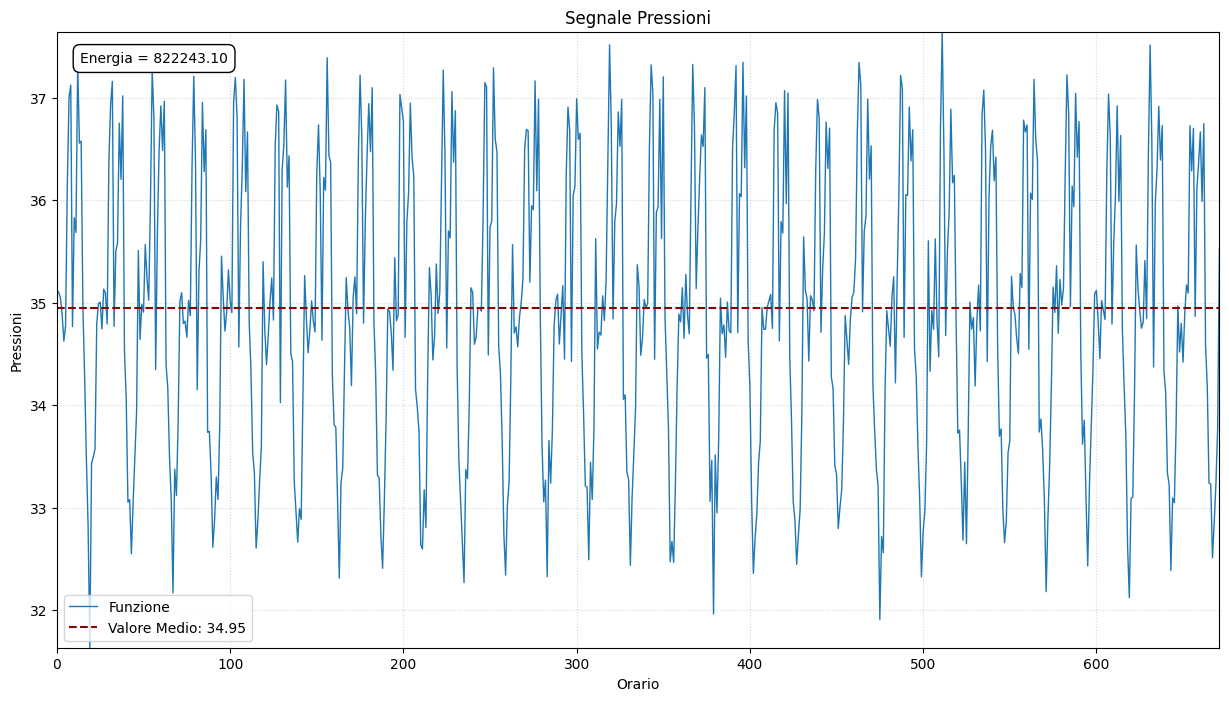

In [32]:
###grafici in una sola finestra###

#finestra unica


#GRAFICO 1---------------
energia_pressioni_1 = energia(pressioni)
plt.figure(figsize=(15,8))
plt.plot(ore, pressioni, label='Funzione', color='#1f77b4', linewidth=1)
plt.axhline(valore_medio(pressioni), linestyle='--', color='darkred', label=f'Valore Medio: {valore_medio(pressioni):.2f}')
plt.xlim(min(ore), max(ore))
plt.ylim(min(pressioni), max(pressioni))
plt.xlabel("Orario")
plt.ylabel("Pressioni")
plt.title("Segnale Pressioni")
plt.grid(True, linestyle=':', alpha=0.5)
plt.text(
    0.02, 0.95, # Posizione: 2% dal bordo sx, 95% dal bordo inf (cioè in alto a sx)
    s=f'Energia = {energia_pressioni_1:.2f}',
    transform=plt.gca().transAxes, # <-- LA PARTE IMPORTANTE
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)
plt.legend()
plt.show()


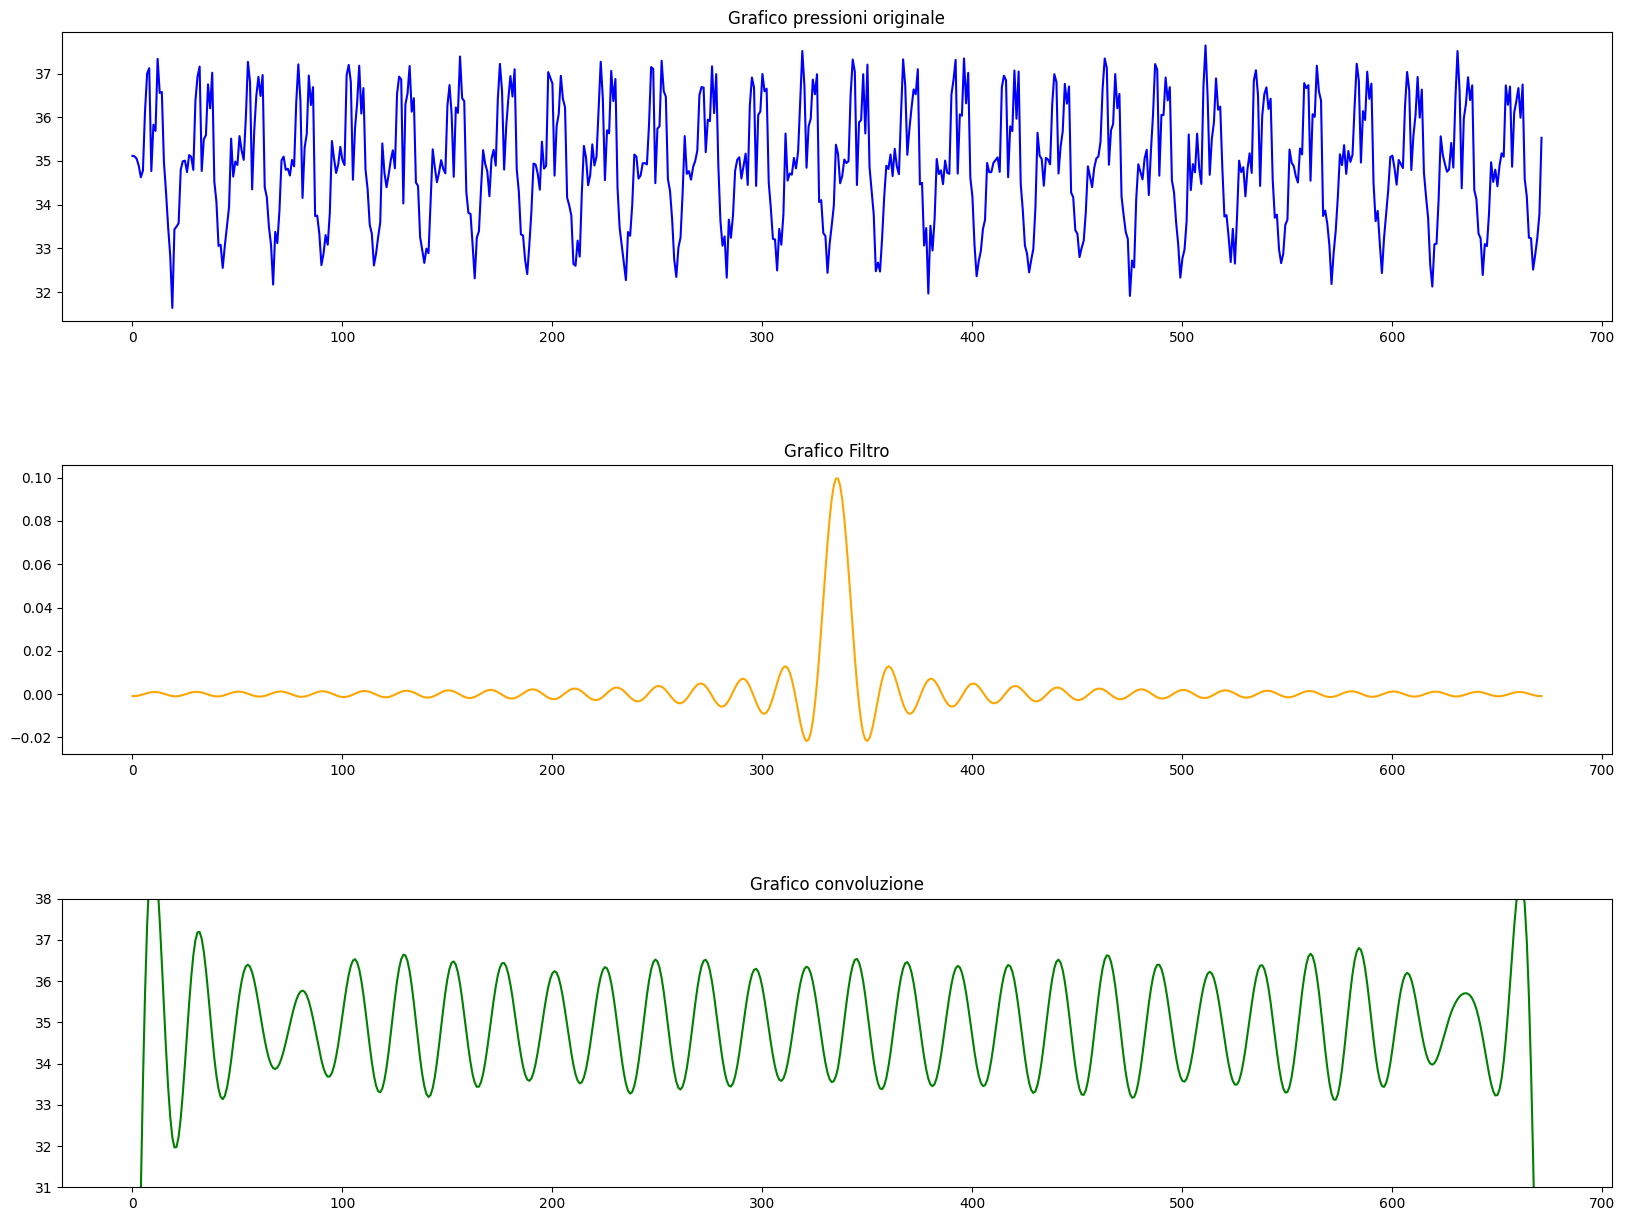

In [33]:
# --- ESERCIZIO 2.1 ---

# DEFINIZIONE DELLE VARIABILI
x_spostato = np.subtract(ore, (len(ore)-1)/2) #Asse ascisse centrato

B = 0.1 #Fattore scalatura sinc

h_x = B * np.sinc(B * x_spostato)

y_n = np.convolve(pressioni, h_x, mode="same")

# GRAFICI
fig, (ax1 , ax2 , ax3) = plt.subplots(3 , 1 ,figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)

ax1.plot(ore, pressioni , color='blue')
ax1.set_title("Grafico pressioni originale")


ax2.plot(ore , h_x, label='funzione 2', color='orange')
ax2.set_title("Grafico Filtro")

ax3.plot(ore, y_n , color="green")
ax3.set_title("Grafico convoluzione")
plt.ylim(31,38)

plt.show()

<Figure size 1500x800 with 0 Axes>

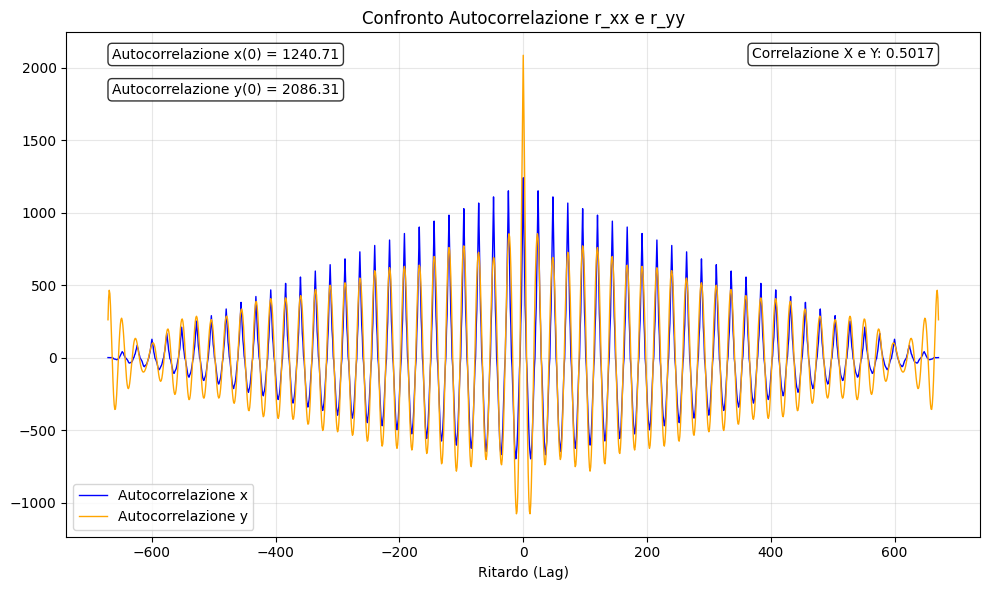

In [34]:
#Esercizio 2 punto b
#autocorrelazione segnali x e y

x1N = pressioni - np.mean(pressioni)
y1N = y_n - np.mean(y_n)
r_xx = np.correlate(x1N, x1N, mode='full')
r_yy = np.correlate(y1N, y1N, mode='full')
lag = np.arange(-len(pressioni) + 1, len(pressioni))

##GRAFICO 2B
plt.figure(figsize=(15,8))

fig, ax = plt.subplots(figsize=(10, 6))

# Autocorrelazione X
ax.plot(lag, r_xx, label='Autocorrelazione x', color='blue', linewidth=1)

# Autocorrelazione Y
ax.plot(lag, r_yy, label='Autocorrelazione y', color='orange', linewidth=1)


ax.set_title("Confronto Autocorrelazione r_xx e r_yy")
ax.set_xlabel("Ritardo (Lag)")
ax.grid(True, alpha=0.3)
ax.legend()


ax.text(0.05, 0.97,
        f'Autocorrelazione x(0) = {r_xx[len(r_xx)//2]:.2f}', 
        transform=ax.transAxes, 
        fontsize=10,
        verticalalignment='top',
        horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax.text(0.05, 0.90,
        f'Autocorrelazione y(0) = {r_yy[len(r_yy)//2]:.2f}', 
        transform=ax.transAxes, 
        fontsize=10,
        verticalalignment='top',
        horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


# Correlazione xy
correlazione_xy = np.corrcoef(pressioni, y_n)[0, 1]
testo_corr = f'Correlazione X e Y: {correlazione_xy:.4f}'


ax.text(0.95, 0.97,
        testo_corr, 
        transform=ax.transAxes, 
        fontsize=10,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [35]:
##CALCOLO VARIANZA E ENERGIA##

var_x = np.var(x1N)
var_y = np.var(y1N)

print(f"--- Varianza ---")
print(f"Varianza segnale originale (x1N): {var_x:.2f}")
print(f"Varianza segnale filtrato (y1N): {var_y:.2f}")

N = len(x1N) 

energia_x = r_xx[N - 1] 
energia_y = r_yy[N - 1]


# energia_x = np.correlate(x1N, x1N, mode='valid')[0]
# energia_y = np.correlate(y1N, y1N, mode='valid')[0]

print(f"\n--- Energia (Autocorrelazione a Lag 0) ---")
print(f"Energia segnale originale (r_xx[0]): {energia_x:.2f}")
print(f"Energia segnale filtrato (r_yy[0]): {energia_y:.2f}")


def calcola_larghezza_lobo(autocorr_array):
    
    """Calcola la larghezza del lobo centrale come la distanza 
    tra il primo zero prima del picco e il primo zero dopo il picco."""
    
    center_index = len(autocorr_array) // 2
    index_zero_before = -1
    index_zero_after = -1

    for i in range(center_index + 1, len(autocorr_array)):
        if autocorr_array[i] <= 0:
            index_zero_after = i
            break
            
    for i in range(center_index - 1, -1, -1):
        if autocorr_array[i] <= 0:
            index_zero_before = i
            break
            
    if index_zero_before != -1 and index_zero_after != -1:
        larghezza = index_zero_after - index_zero_before
        return larghezza
    else:
        print("Attenzione: Impossibile trovare entrambi gli zeri del lobo centrale.")
        print(f"Indice prima: {index_zero_before}, Indice dopo: {index_zero_after}")
        return -1

width_x = calcola_larghezza_lobo(r_xx)
width_y = calcola_larghezza_lobo(r_yy)

print(f"\n--- Larghezza Lobo Centrale ---")
print(f"Larghezza lobo segnale originale (x1N): {width_x} campioni")
print(f"Larghezza lobo segnale filtrato (y1N): {width_y} campioni")

--- Varianza ---
Varianza segnale originale (x1N): 1.85
Varianza segnale filtrato (y1N): 3.10

--- Energia (Autocorrelazione a Lag 0) ---
Energia segnale originale (r_xx[0]): 1240.71
Energia segnale filtrato (r_yy[0]): 2086.31

--- Larghezza Lobo Centrale ---
Larghezza lobo segnale originale (x1N): 12 campioni
Larghezza lobo segnale filtrato (y1N): 12 campioni


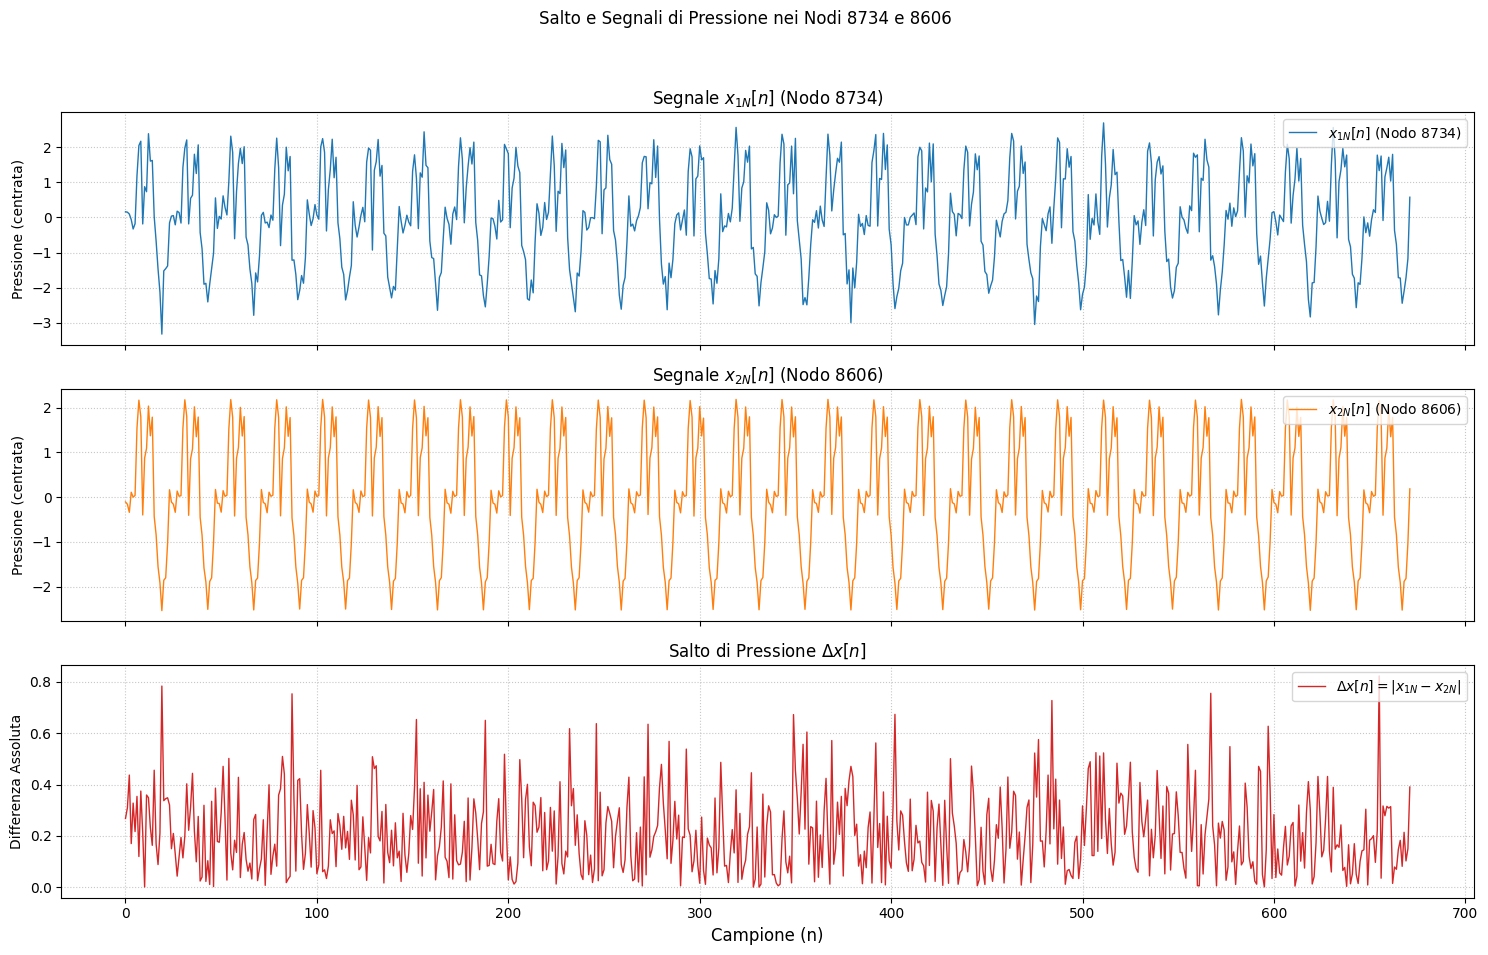

In [36]:
##ESERCIZIO 3##

#punto a

x2N = x2 - np.mean(x2)            

if len(x1N) != len(x2N):
    min_length = min(len(x1N), len(x2N))
    x1N = x1N[:min_length]
    x2N = x2N[:min_length] 

delta_x = np.abs(x1N - x2N)

figes3, axs_es3 = plt.subplots(3,1, figsize=(15,10), sharex=True)
figes3.suptitle("Salto e Segnali di Pressione nei Nodi 8734 e 8606")

#nodo 8734
axs_es3[0].plot(ore, x1N, label='$x_{1N}[n]$ (Nodo 8734)', color='#1f77b4', linewidth=1)
axs_es3[0].set_title('Segnale $x_{1N}[n]$ (Nodo 8734)')
axs_es3[0].set_ylabel('Pressione (centrata)')
axs_es3[0].grid(True, linestyle=':', alpha=0.7)
axs_es3[0].legend(loc='upper right')

#nodo 8606
axs_es3[1].plot(ore, x2N, label='$x_{2N}[n]$ (Nodo 8606)', color='#ff7f0e', linewidth=1)
axs_es3[1].set_title('Segnale $x_{2N}[n]$ (Nodo 8606)')
axs_es3[1].set_ylabel('Pressione (centrata)')
axs_es3[1].grid(True, linestyle=':', alpha=0.7)
axs_es3[1].legend(loc='upper right')

#salto
axs_es3[2].plot(ore, delta_x, label='$\Delta x[n] = |x_{1N} - x_{2N}|$', color='#d62728', linewidth=1)
axs_es3[2].set_title('Salto di Pressione $\Delta x[n]$')
axs_es3[2].set_xlabel('Campione (n)', fontsize=12)
axs_es3[2].set_ylabel('Differenza Assoluta')
axs_es3[2].grid(True, linestyle=':', alpha=0.7)
axs_es3[2].legend(loc='upper right')

figes3.tight_layout(rect=[0, 0.03, 1, 0.95])

fig.tight_layout(pad = 3.0)
plt.show()

In [37]:
#punto b

K = 3

windows_x1N = np.array_split(x1N, K)
windows_x2N = np.array_split(x2N, K)

rho_k_list = [] 

print(f"Calcolo coefficienti di correlazione per K={K} finestre:")

for k in range(K):
    finestra_x1 = windows_x1N[k]
    finestra_x2 = windows_x2N[k]
    
    rho_k = np.corrcoef(finestra_x1, finestra_x2)[0, 1]
    
    rho_k_list.append(float(rho_k))
    
    print(f"  Finestra k={k+1}: Coefficiente di correlazione = {rho_k}")



Calcolo coefficienti di correlazione per K=3 finestre:
  Finestra k=1: Coefficiente di correlazione = 0.9813121647917789
  Finestra k=2: Coefficiente di correlazione = 0.9826757699392518
  Finestra k=3: Coefficiente di correlazione = 0.9815123714588418
